In [186]:
# Import the necessary modules and libraries
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [202]:
# Load the dataset
df = pd.read_csv("../Data/data_for_lr.csv")
df = df.drop(["Unnamed: 0","country","year","TV-14","TV-MA","TV-PG"],1)
X = df.drop("revenue",1)
y = df["revenue"]

,imdb_rating,imdb_votes,language,production,released_on_weekend,released_on_dump_month,runtime,budget,actor_popularity,director_popularity,...,mystery,romance,thriller,other_genre,G,NC-17,PG,PG-13,R,UNRATED
0,7.3,11.976842,2,102,1,0,111,16.811243,21.727389,2.029155,...,0,1,0,0,0,0,0,0,1,0
1,7.9,12.884159,9,163,1,1,109,18.146244,13.835096,2.089790,...,0,0,1,0,0,0,0,0,1,0
2,6.5,11.101840,2,21,1,0,84,18.269858,16.142013,1.000927,...,1,0,1,0,0,0,0,0,1,0
3,1.7,8.754634,1,102,0,1,91,17.989898,13.566246,1.000000,...,0,0,0,0,0,0,1,0,0,0
4,5.2,12.177020,1,210,1,1,114,18.515991,7.153206,2.828585,...,0,0,1,0,0,0,0,1,0,0


In [203]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [204]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regresser1 = regr_1.fit(x_train, y_train)
regresser2 = regr_2.fit(x_train, y_train)

In [205]:
# Predict
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
#zz = np.reshape(y_1, (712))
mse1 = np.average((y_1-np.array(y_test))**2)
mse2 = np.average((y_2-np.array(y_test))**2)
print (mse1, mse2)

3.05564074588 2.25312587554


In [206]:
#regr_1.decision_path(x_test)
tree.export_graphviz(regresser1, out_file='../Data/tree1.dot') 
tree.export_graphviz(regresser2, out_file='../Data/tree2.dot') 

In [207]:
regr_1.feature_importances_

array([ 0.        ,  0.15154685,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.84845315,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [208]:
regr_2.feature_importances_

array([ 0.00187272,  0.22337238,  0.        ,  0.        ,  0.00091876,
        0.        ,  0.01718695,  0.71008581,  0.00940428,  0.        ,
        0.        ,  0.        ,  0.00371059,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.03344851,  0.        ])

In [209]:
regr_1.score(x_train, y_train)

0.49311635532312942

In [211]:
regr_2.score(x_train, y_train)

0.67110717235553219

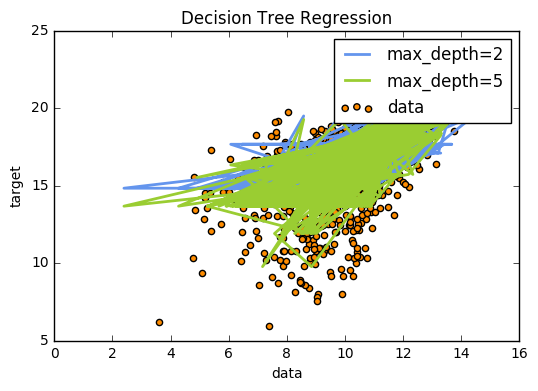

In [212]:
# Plot the results
plt.figure()
plt.scatter(x_train['imdb_votes'], y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(x_test['imdb_votes'], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(x_test['imdb_votes'], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [70]:
from matplotlib import pyplot as plt
%matplotlib inline 

In [220]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(x_train[["imdb_votes","budget"]],y_train)
nx = 30
ny = 30
# creating a grid of points
x_budget = np.linspace(0, 20, nx) 
y_votes = np.linspace(0, 20, ny)
xx, yy = np.meshgrid(x_budget, y_votes)
# evaluating the regressor on all the points
z = regr_1.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z, (nx, ny))

TypeError: Dimensions of C (30, 30) are incompatible with X (712) and/or Y (712); see help(pcolormesh)

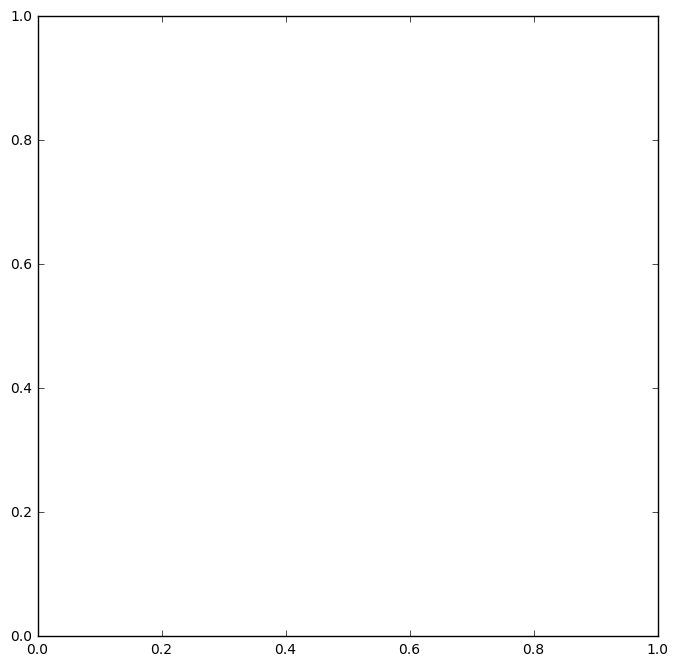

In [222]:
fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_test['budget'], x_test['imdb_votes'], zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='revenue predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(x_train['budget'], x_train['imdb_votes'], s=y_train/2.50, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_test['budget']), np.max(x_test['budget']))
plt.ylim(np.min(x_test['imdb_votes']), np.max(x_test['imdb_votes']))
plt.xlabel('budget')
plt.ylabel('imdb_votes')
plt.show()